In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import argmax
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Convolution2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
image_size = (128,128)
batch_size = 50

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/karol/python_projekty/cv2/sudoku/data/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/karol/python_projekty/cv2/sudoku/data/test",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 8000 files belonging to 10 classes.
Using 6400 files for training.
Found 2000 files belonging to 10 classes.
Using 400 files for validation.


2022-02-02 21:11:59.366403: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [3]:
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.08),
    ]
)

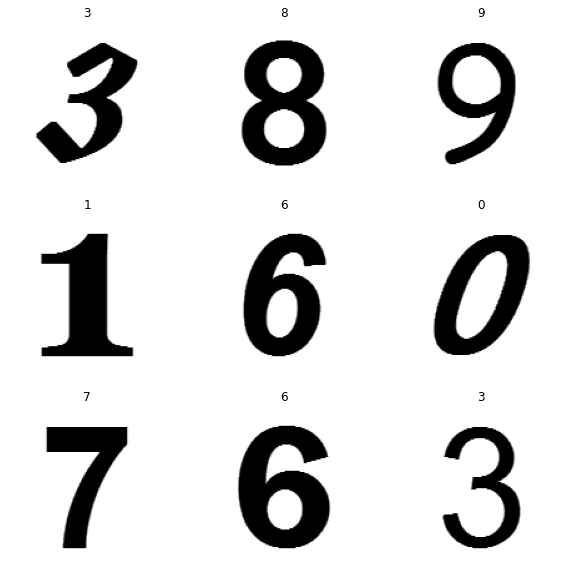

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

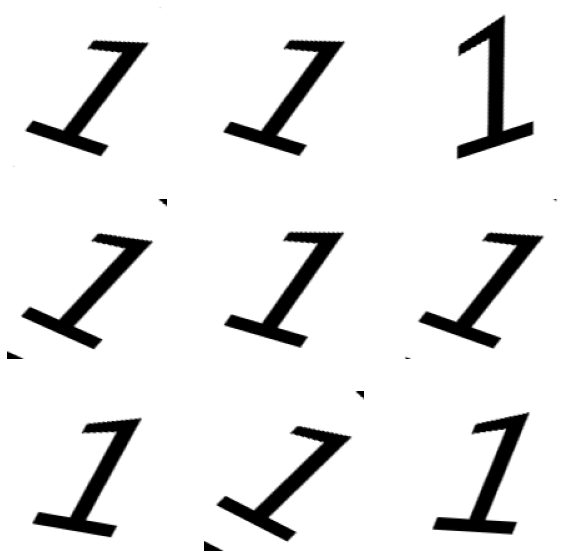

In [5]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

plt.show()

In [9]:
layers = \
  [ Convolution2D(128, 3, 3, input_shape=(128, 128, 3), activation='relu')
   , MaxPooling2D(pool_size=(2, 2))
   , Convolution2D(64, 2, 1, activation='relu')
   , MaxPooling2D(pool_size=(2, 2))
   , Convolution2D(32, 2, 1, activation='relu')
   , Convolution2D(16, 2, 1, activation='relu')
   , Flatten()
   , Dense(1024, activation='relu')
   , Dropout(0.5)
   , Dense(512, activation='relu')
   , Dropout(0.5)
   , Dense(10)
   , Activation('softmax')
  ]

model = Sequential()
for layer in layers:
    model.add(layer)

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint("/home/karol/python_projekty/cv2/sudoku/models/save_at_{epoch}.h5"),
]
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_ds, epochs=12, batch_size=6, validation_data=val_ds, callbacks=callbacks)

Epoch 1/12
128/128 [==============================] - 8s 62ms/step - loss: 2.0175 - accuracy: 0.4737 - val_loss: 0.3413 - val_accuracy: 0.8875
Epoch 2/12
128/128 [==============================] - 8s 63ms/step - loss: 0.3158 - accuracy: 0.9036 - val_loss: 0.2160 - val_accuracy: 0.9350
Epoch 3/12
128/128 [==============================] - 8s 60ms/step - loss: 0.1995 - accuracy: 0.9377 - val_loss: 0.2980 - val_accuracy: 0.9125
Epoch 4/12
128/128 [==============================] - 8s 59ms/step - loss: 0.1463 - accuracy: 0.9516 - val_loss: 0.1846 - val_accuracy: 0.9525
Epoch 5/12
128/128 [==============================] - 8s 60ms/step - loss: 0.1164 - accuracy: 0.9634 - val_loss: 0.1752 - val_accuracy: 0.9575
Epoch 6/12
128/128 [==============================] - 8s 62ms/step - loss: 0.1012 - accuracy: 0.9681 - val_loss: 0.2695 - val_accuracy: 0.9450
Epoch 7/12
128/128 [==============================] - 8s 62ms/step - loss: 0.0704 - accuracy: 0.9795 - val_loss: 0.1924 - val_accuracy: 0.9525

In [8]:
img = keras.preprocessing.image.load_img(
    "/home/karol/python_projekty/cv2/sudoku/data/test/2/img003-00005.png", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(argmax(predictions))

2
